<a href="https://colab.research.google.com/github/KPabsy/Hyperparameter-Tuning-Polynomials/blob/main/Polynomial_Regression_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np

np.random.seed(0)
x = 1+2*np.random.normal(0,1,1000)
y = x+1.5*(x**2)+0.8*(x**3)+np.random.normal(0,3,1000)

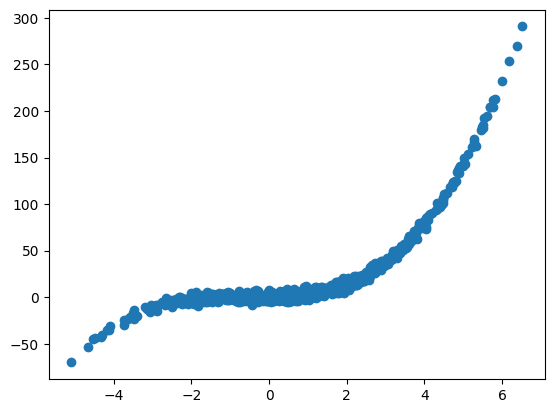

In [24]:
import matplotlib.pyplot as plt

plt.scatter(x,y)

In [25]:
from sklearn.model_selection import train_test_split

x=x[:,np.newaxis]
y=y[:,np.newaxis]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
X_train,X_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.25,random_state=1)


#Hyperparameter Tuning

In [26]:
from sklearn.linear_model import LinearRegression

lin_reg_1=LinearRegression()
lin_reg_1.fit(X_train,y_train)
print("Degree 1 training error : ",lin_reg_1.score(X_train,y_train))
print("Degree 1 validation error : ",lin_reg_1.score(X_val,y_val))


Degree 1 training error :  0.6112766542009314
Degree 1 validation error :  0.578092525888924


In [27]:
from sklearn.preprocessing import PolynomialFeatures
ploy_reg = PolynomialFeatures(degree=2)
X_poly2=ploy_reg.fit_transform(X_train)
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly2,y_train)

LinearRegression()

In [28]:
X_ploy_val2=ploy_reg.fit_transform(X_val)
print("Degree 2 training error : ",lin_reg_2.score(X_poly2,y_train))
print("Degree 2 validation error : ",lin_reg_2.score(X_ploy_val2,y_val))

Degree 2 training error :  0.8901821639950546
Degree 2 validation error :  0.8567139925783426


In [29]:
from sklearn.preprocessing import PolynomialFeatures
ploy_reg = PolynomialFeatures(degree=3)
X_poly3=ploy_reg.fit_transform(X_train)
lin_reg_3=LinearRegression()
lin_reg_3.fit(X_poly3,y_train)

LinearRegression()

In [30]:
X_ploy_val3=ploy_reg.fit_transform(X_val)
print("Degree 3 training error : ",lin_reg_3.score(X_poly3,y_train))
print("Degree 3 validation error : ",lin_reg_3.score(X_ploy_val3,y_val))

Degree 3 training error :  0.9941068693023871
Degree 3 validation error :  0.9941018868235563


In [31]:
from sklearn.preprocessing import PolynomialFeatures
ploy_reg = PolynomialFeatures(degree=10)
X_poly10=ploy_reg.fit_transform(X_train)
lin_reg_10=LinearRegression()
lin_reg_10.fit(X_poly10,y_train)

LinearRegression()

In [32]:
X_ploy_val10=ploy_reg.fit_transform(X_val)
print("Degree 10 training error : ",lin_reg_10.score(X_poly10,y_train))
print("Degree 10 validation error : ",lin_reg_10.score(X_ploy_val10,y_val))

Degree 10 training error :  0.9941459898641348
Degree 10 validation error :  0.9939752142445845


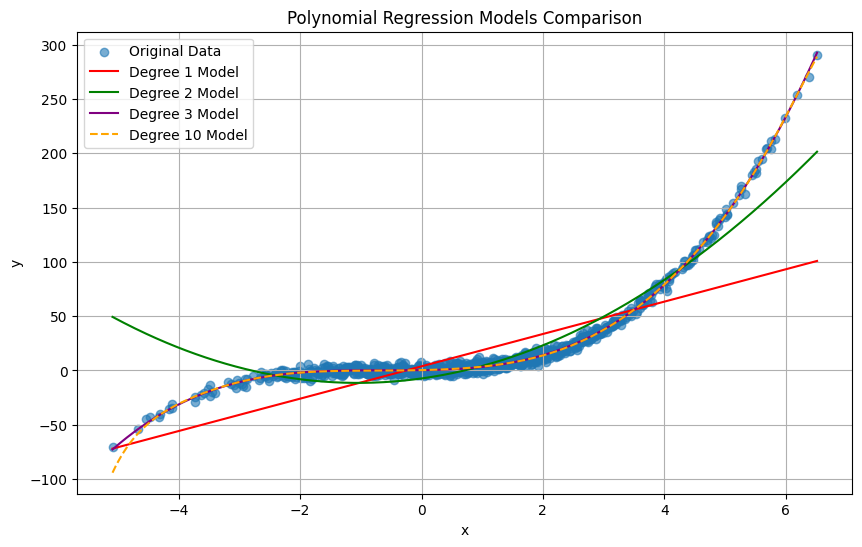

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Original Data', alpha=0.6)

# Generate points for plotting the regression lines
x_plot = np.linspace(x.min(), x.max(), 500).reshape(-1, 1)

# Degree 1 Linear Regression
y_plot_deg1 = lin_reg_1.predict(x_plot)
plt.plot(x_plot, y_plot_deg1, label='Degree 1 Model', color='red')

# Degree 2 Polynomial Regression
poly_reg_2 = PolynomialFeatures(degree=2)
x_plot_poly2 = poly_reg_2.fit_transform(x_plot)
y_plot_deg2 = lin_reg_2.predict(x_plot_poly2)
plt.plot(x_plot, y_plot_deg2, label='Degree 2 Model', color='green')

# Degree 3 Polynomial Regression
poly_reg_3 = PolynomialFeatures(degree=3)
x_plot_poly3 = poly_reg_3.fit_transform(x_plot)
y_plot_deg3 = lin_reg_3.predict(x_plot_poly3)
plt.plot(x_plot, y_plot_deg3, label='Degree 3 Model', color='purple')

# Degree 10 Polynomial Regression
poly_reg_10 = PolynomialFeatures(degree=10)
x_plot_poly10 = poly_reg_10.fit_transform(x_plot)
y_plot_deg10 = lin_reg_10.predict(x_plot_poly10)
plt.plot(x_plot, y_plot_deg10, label='Degree 10 Model', color='orange', linestyle='--')

plt.title('Polynomial Regression Models Comparison')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()